In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
import os

path =str(os.getcwd()).replace('\\','/')
# s=pd.read_csv(path +'/datasets/ch08_data/tips.csv',engine = 'python')

In [38]:
prices=pd.read_csv(path +'/datasets/ch11_data/stock_px.csv',engine = 'python',parse_dates=True,index_col=0)
prices=prices.loc['2011-09-06':'2011-09-14',['AAPL','JNJ','SPX','XOM']]
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [39]:
volume=pd.read_csv(path +'/datasets/ch11_data/volume.csv',engine = 'python',parse_dates=True,index_col=0)
volume=volume.loc['2011-09-06':'2011-09-12',['AAPL','JNJ','XOM']]
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [41]:
# 计算一个成交量加权平均价格(为了简单起见，假设成交量数据是价值数据的子集)
prices*volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [42]:
vwap = (prices*volume).sum()/volume.sum()
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [43]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [44]:
# SPX在volume中找不到，可以直接丢弃。
# 如果希望手工对齐，可以使用DataFrame的align方法，它返回的是一个元组，含有两个对象的重索引版本
prices.align(volume,join='inner')

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

In [45]:
# 通过一组可能不同的索引的Series构建一个DataFrame
s1 = pd.Series(range(3),index=['a','b','c'])
s2 = pd.Series(range(4),index=['d','b','c','e'])
s3 = pd.Series(range(3),index=['f','a','c'])
pd.DataFrame({'one':s1,'two':'s2','three':s3})

,one,three,two
a,0.0,1.0,s2
b,1.0,NaN,s2
c,2.0,2.0,s2
f,NaN,0.0,s2


In [46]:
# 也可以显示定义结果的索引（丢弃其余数据）
pd.DataFrame({'one':s1,'two':s2,'three':s3},index=list('face'))  # 只保留部分索引的数据

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,NaN
c,2.0,2.0,2.0
e,NaN,NaN,3.0


# 频率不同的时间序列的运算
频率转换和重对齐的两大工具是resample和reindex
- resample用于将数据转换到固定频率
- reindex用于使数据符合一个新索引
- 都支持插值（如前向填充）逻辑

In [47]:
# 周型时间序列
ts1 = pd.Series(np.random.randn(3),index=pd.date_range('2012-6-13',periods=3,freq='W-WED'))
ts1

2012-06-13    1.063746
2012-06-20   -0.417105
2012-06-27    1.050647
Freq: W-WED, dtype: float64

In [49]:
# 如果将其重采样到工作日（星期一到星期五）频率，则那些没有数据的日子就会出现一个“空洞”
ts1.resample('B').asfreq()

2012-06-13    1.063746
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20   -0.417105
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27    1.050647
Freq: B, dtype: float64

In [50]:
# 只需将fill_method设置为‘ffill’即可用起那么的值填充这些空白
ts1.resample('B',fill_method='ffill')

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


2012-06-13    1.063746
2012-06-14    1.063746
2012-06-15    1.063746
2012-06-18    1.063746
2012-06-19    1.063746
2012-06-20   -0.417105
2012-06-21   -0.417105
2012-06-22   -0.417105
2012-06-25   -0.417105
2012-06-26   -0.417105
2012-06-27    1.050647
Freq: B, dtype: float64

In [51]:
# 将较低频率的数据升采样到较高的规整频率是一种不错的解决方案
# 但对于不规整时间序列，如下
dates = pd.DatetimeIndex(['2012-6-12','2012-6-17','2012-6-18','2012-6-21','2012-6-22','2012-6-29'])
ts2 = pd.Series(np.random.randn(6),index=dates)
ts2

2012-06-12   -0.770483
2012-06-17    0.319822
2012-06-18   -1.141505
2012-06-21    1.728708
2012-06-22    1.991976
2012-06-29    2.072726
dtype: float64

In [52]:
# 如果要将ts1中‘当前值’(即前向填充)加到ts2.
# 一个办法是将两者重采用为规整频率后再相加，但是，如果想维持ts2的日期索引，则reindex是一种更好的解决方法
ts1.reindex(ts2.index,method='ffill')

2012-06-12         NaN
2012-06-17    1.063746
2012-06-18    1.063746
2012-06-21   -0.417105
2012-06-22   -0.417105
2012-06-29    1.050647
dtype: float64

In [53]:
ts2+ts1.reindex(ts2.index,method='ffill')

2012-06-12         NaN
2012-06-17    1.383567
2012-06-18   -0.077759
2012-06-21    1.311603
2012-06-22    1.574871
2012-06-29    3.123373
dtype: float64

## 使用Period
Period（表示时间区间）提供另一种处理不同频率时间序列的方法，尤其是那些有着特殊规范的以年或季度为频率的金融或经济序列。比如：一个公司可能会发布其以6月结尾的财年的每季度盈利报告，即频率为Q-JUN。

In [54]:
# 以下是两个有关GDP和通货膨胀的宏观经济时间序列
gdp = pd.Series([1.78,1.94,2.08,2.01,2.15,2.31,2.46],
                index = pd.period_range('1984Q2',periods=7,freq='Q-SEP'))
infl = pd.Series([0.025,0.045,0.037,0.04],
                 index = pd.period_range('1982',periods=4,freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [55]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [57]:
# 跟Timestamp的时间序列不同，由Period索引的两个不同频率的时间序列之间的运算必须进行显式转换
# infl值是每年年末观测的，可以将其转换到Q-SEP以得到该频率下的正确时期
infl_q = infl.asfreq('Q-SEP',how='end')
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [58]:
# 然后这个时间序列就可以被重索引了（使用前向填充以匹配gdp）
infl_q.reindex(gdp.index,method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

# 时间和“最当前”数据选取
从数据中抽取每天特定时间的数据

In [71]:
# 生成一个交易日内的日期范围和时间序列
rng = pd.date_range('2012-06-01 09:30','2012-06-01 15:59',freq='T')  #freq='T':按分钟
rng

DatetimeIndex(['2012-06-01 09:30:00', '2012-06-01 09:31:00',
               '2012-06-01 09:32:00', '2012-06-01 09:33:00',
               '2012-06-01 09:34:00', '2012-06-01 09:35:00',
               '2012-06-01 09:36:00', '2012-06-01 09:37:00',
               '2012-06-01 09:38:00', '2012-06-01 09:39:00',
               ...
               '2012-06-01 15:50:00', '2012-06-01 15:51:00',
               '2012-06-01 15:52:00', '2012-06-01 15:53:00',
               '2012-06-01 15:54:00', '2012-06-01 15:55:00',
               '2012-06-01 15:56:00', '2012-06-01 15:57:00',
               '2012-06-01 15:58:00', '2012-06-01 15:59:00'],
              dtype='datetime64[ns]', length=390, freq='T')

In [75]:
# 生成4天的时间点（9:30 ~ 15:59 之间的值）
# pd.offsets.BDay(1)：添加一个工作日
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1,4)])  # 增加三个工作日：6.4,6.5,6.6
rng

DatetimeIndex(['2012-06-01 09:30:00', '2012-06-01 09:31:00',
               '2012-06-01 09:32:00', '2012-06-01 09:33:00',
               '2012-06-01 09:34:00', '2012-06-01 09:35:00',
               '2012-06-01 09:36:00', '2012-06-01 09:37:00',
               '2012-06-01 09:38:00', '2012-06-01 09:39:00',
               ...
               '2012-06-06 15:50:00', '2012-06-06 15:51:00',
               '2012-06-06 15:52:00', '2012-06-06 15:53:00',
               '2012-06-06 15:54:00', '2012-06-06 15:55:00',
               '2012-06-06 15:56:00', '2012-06-06 15:57:00',
               '2012-06-06 15:58:00', '2012-06-06 15:59:00'],
              dtype='datetime64[ns]', length=1560, freq=None)

In [76]:
ts = pd.Series(np.arange(len(rng),dtype=float),index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
2012-06-01 09:36:00       6.0
2012-06-01 09:37:00       7.0
2012-06-01 09:38:00       8.0
2012-06-01 09:39:00       9.0
2012-06-01 09:40:00      10.0
2012-06-01 09:41:00      11.0
2012-06-01 09:42:00      12.0
2012-06-01 09:43:00      13.0
2012-06-01 09:44:00      14.0
2012-06-01 09:45:00      15.0
2012-06-01 09:46:00      16.0
2012-06-01 09:47:00      17.0
2012-06-01 09:48:00      18.0
2012-06-01 09:49:00      19.0
2012-06-01 09:50:00      20.0
2012-06-01 09:51:00      21.0
2012-06-01 09:52:00      22.0
2012-06-01 09:53:00      23.0
2012-06-01 09:54:00      24.0
2012-06-01 09:55:00      25.0
2012-06-01 09:56:00      26.0
2012-06-01 09:57:00      27.0
2012-06-01 09:58:00      28.0
2012-06-01 09:59:00      29.0
                        ...  
2012-06-06 15:30:00    1530.0
2012-06-06 15:31:00    1531.0
2012-06-06

In [77]:
# 利用python的datetime.time对象进行索引即可抽取出这些点上的值
from datetime import time
ts[time(10,0)]  #  抽取10点的数据

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [78]:
# 实际上，该操作用到了实例方法at_time（各时间序列以及类似的DataFrame对象都有）
ts.at_time(time(10,0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [79]:
# between_time方法是用于选取两个Time对象之间的值
ts.between_time(time(10,0),time(10,1))  # 抽取出10点到10点零一分钟之间的值，包含两个边界的数据

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [82]:
# 可能刚好就没有任何数据落在某个具体时间上（比如上午10点），这时，希望得到上午10点之前最后出现的那个值
# 将该时间序列的大部分内容随机设置为NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
indexer

array([   0,    1,    2,    4,    5,    7,    8,   10,   12,   13,   15,
         16,   17,   19,   20,   21,   26,   27,   28,   29,   31,   32,
         33,   35,   36,   38,   44,   47,   48,   49,   50,   54,   55,
         63,   67,   68,   69,   73,   74,   76,   78,   80,   82,   84,
         86,   89,   91,   93,   95,   98,  101,  109,  114,  122,  124,
        125,  129,  131,  132,  133,  137,  139,  141,  142,  143,  145,
        147,  152,  153,  154,  155,  156,  159,  160,  162,  165,  167,
        168,  169,  170,  171,  172,  173,  176,  177,  178,  182,  183,
        184,  185,  186,  187,  189,  190,  192,  193,  197,  202,  203,
        204,  205,  206,  207,  209,  210,  211,  212,  213,  215,  216,
        219,  221,  223,  224,  225,  226,  229,  231,  232,  236,  238,
        242,  245,  247,  249,  250,  251,  252,  253,  254,  255,  257,
        258,  260,  261,  263,  264,  265,  268,  272,  273,  275,  277,
        281,  282,  284,  286,  287,  288,  292,  2

In [83]:
irr_ts = ts.copy()
irr_ts[indexer]=np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00     NaN
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00    23.0
2012-06-01 09:54:00    24.0
2012-06-01 09:55:00    25.0
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00    30.0
dtype: float64

In [84]:
# 如果将一组Timestamp传入asof方法，就能得到这些时间点处（或其之前最近）的有效值（非NA）
# 构造一个日期范围（每天上午10点），然后将其传入asof
selection = pd.date_range('2012-06-01 10:00',periods=4,freq='B')
selection

DatetimeIndex(['2012-06-01 10:00:00', '2012-06-04 10:00:00',
               '2012-06-05 10:00:00', '2012-06-06 10:00:00'],
              dtype='datetime64[ns]', freq='B')

In [85]:
irr_ts.asof(selection)

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
Freq: B, dtype: float64

# 拼接多个数据源
- 在一个特定的时间点上，从一个数据源切换到另一个数据源
- 用另一个时间序列对当前时间序列中的缺失值“打补丁”
- 将数据中的符号（国家、资产代码等）替换为实际数据

In [86]:
# 在特定时刻从一个时间序列切换到另一个，用concat将两个TimeSeries或DataFrame对象合并到一起
data1 = pd.DataFrame(np.ones((6,3),dtype=float),
                     columns=['a','b','c'],
                     index = pd.date_range('6/12/2012',periods=6))
data1

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,1.0,1.0,1.0
2012-06-16,1.0,1.0,1.0
2012-06-17,1.0,1.0,1.0


In [91]:
data2 = pd.DataFrame(np.ones((6,3),dtype=float)*2,
                     columns=['a','b','c'],
                     index = pd.date_range('6/13/2012',periods=6))
data2

,a,b,c
2012-06-13,2.0,2.0,2.0
2012-06-14,2.0,2.0,2.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [92]:
spliced = pd.concat([data1.ix[:'2012-06-14'],data2.ix['2012-06-15':]])
spliced

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [94]:
# 假设data1缺失了data2中存在的某个时间序列
data2 = pd.DataFrame(np.ones((6,4),dtype=float)*2,
                     columns=['a','b','c','d'],
                     index = pd.date_range('6/13/2012',periods=6))
spliced = pd.concat([data1.ix[:'2012-06-14'],data2.ix['2012-06-15':]])
spliced

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [95]:
# combine_first可以引入合并点之前的数据，这样也就扩展了‘d’项的历史
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [97]:
# DataFrame也有一个类似方法update，可以实现就地更新，如果只想填充空洞，则必须传入overwrite=False才行
spliced.update(data2,overwrite=False)
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [98]:
# 上面的都可以实现将数据中的符号替换为实际数据，但有时利用DataFrame的索引机制直接对列进行设置会更简单
cp_spliced = spliced.copy()
cp_spliced[['a','c']] = data1[['a','c']]
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


# 收益指数和累计指数
金融领域中，收益（return）通常指的是某资产价格的百分比变化

In [111]:
# 2011到2012年间苹果公司的股票价格数据
import  pandas_datareader.data as web
price = web.get_data_yahoo('AAPL','2011-01-01','2012-07-27')['Adj Close']
price[-5:]

Date
2012-07-23    74.676285
2012-07-24    74.316422
2012-07-25    71.107155
2012-07-26    71.096016
2012-07-27    72.367340
Name: Adj Close, dtype: float64

In [114]:
# 计算两个时间点指甲的累计百分比回报只需计算价格的百分比变化即可
price['2011-10-03']/price['2011-3-01']-1

0.07239946865659364

In [115]:
# 收益指数是一个表示单位投资（比如1美元）收益的时间序列，从收益指数中可以得出许多假设，比如决定是否进行利润再投资
# 通过cumprod计算出一个简单的收益指数
returns = price.pct_change()  # 表示当前元素与先前元素相差的百分比，这里即当前元素-前一个元素
returns

Date
2010-12-31         NaN
2011-01-03    0.021732
2011-01-04    0.005219
2011-01-05    0.008180
2011-01-06   -0.000808
2011-01-07    0.007161
2011-01-10    0.018833
2011-01-11   -0.002365
2011-01-12    0.008137
2011-01-13    0.003658
2011-01-14    0.008100
2011-01-18   -0.022469
2011-01-19   -0.005313
2011-01-20   -0.018180
2011-01-21   -0.017915
2011-01-24    0.032842
2011-01-25    0.011706
2011-01-26    0.007176
2011-01-27   -0.001861
2011-01-28   -0.020716
2011-01-31    0.009581
2011-02-01    0.016827
2011-02-02   -0.002058
2011-02-03   -0.002556
2011-02-04    0.008910
2011-02-07    0.015527
2011-02-08    0.009435
2011-02-09    0.008333
2011-02-10   -0.010107
2011-02-11    0.006516
                ...   
2012-06-15    0.004549
2012-06-18    0.020291
2012-06-19    0.002783
2012-06-20   -0.002843
2012-06-21   -0.013777
2012-06-22    0.007669
2012-06-25   -0.019464
2012-06-26    0.002207
2012-06-27    0.004318
2012-06-28   -0.009487
2012-06-29    0.026272
2012-07-02    0.014589
2012-0

In [122]:
ret_index = (1+returns).cumprod()   # 累积乘积
ret_index[0] = 1 # 将第一个值设置为1
ret_index

Date
2010-12-31    1.000000
2011-01-03    1.021732
2011-01-04    1.027065
2011-01-05    1.035466
2011-01-06    1.034629
2011-01-07    1.042038
2011-01-10    1.061663
2011-01-11    1.059152
2011-01-12    1.067770
2011-01-13    1.071676
2011-01-14    1.080357
2011-01-18    1.056083
2011-01-19    1.050471
2011-01-20    1.031374
2011-01-21    1.012897
2011-01-24    1.046162
2011-01-25    1.058408
2011-01-26    1.066003
2011-01-27    1.064019
2011-01-28    1.041977
2011-01-31    1.051959
2011-02-01    1.069661
2011-02-02    1.067460
2011-02-03    1.064732
2011-02-04    1.074218
2011-02-07    1.090897
2011-02-08    1.101190
2011-02-09    1.110367
2011-02-10    1.099144
2011-02-11    1.106306
                ...   
2012-06-15    1.779916
2012-06-18    1.816034
2012-06-19    1.821088
2012-06-20    1.815910
2012-06-21    1.790891
2012-06-22    1.804625
2012-06-25    1.769500
2012-06-26    1.773406
2012-06-27    1.781064
2012-06-28    1.764167
2012-06-29    1.810516
2012-07-02    1.836929
2012-0

In [124]:
# 得到收益指数之后，计算指定时期内的累计收益
m_returns = ret_index.resample('BM',how='last').pct_change()
m_returns['2012']

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


Date
2012-01-31    0.127111
2012-02-29    0.188310
2012-03-30    0.105284
2012-04-30   -0.025970
2012-05-31   -0.010703
2012-06-29    0.010853
2012-07-31    0.001986
Freq: BM, Name: Adj Close, dtype: float64

In [125]:
# 上面的结果也能通过重采样聚类从日百分比变化中计算得出
m_rets = (1+returns).resample("M",how='prod',kind='period')-1
m_rets['2012']

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).prod()
  


Date
2012-01    0.127111
2012-02    0.188310
2012-03    0.105284
2012-04   -0.025970
2012-05   -0.010703
2012-06    0.010853
2012-07    0.001986
Freq: M, Name: Adj Close, dtype: float64

# 分组变换和分析

In [5]:
# 以一组假想的股票投资组合为例。首先随机生成1000个股票代码
import random
import string
random.seed(0)
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])  # 随机生成含5个大写字母的代码
tickers[:5]

array(['MYNBI', 'QPMZJ', 'PLSGQ', 'EJEYD', 'TZIRW'], dtype='<U5')

In [6]:
# 创建一个含有3列的Dataframe来承载这些假想数据，不过只选择部分股票组成改投资组合
M =  500
df = pd.DataFrame({'Momentum':np.random.randn(M)/200 + 0.03,
                   'Value':np.random.randn(M)/200 + 0.08,
                   'ShortInterest':np.random.randn(M)/200 -0.02},
                  index = tickers[:M])
df[:5]

,Momentum,ShortInterest,Value
MYNBI,0.033735,-0.016758,0.070012
QPMZJ,0.039123,-0.021287,0.092283
PLSGQ,0.019385,-0.021671,0.074507
EJEYD,0.028480,-0.014490,0.084253
TZIRW,0.026526,-0.022802,0.077527


In [7]:
# 为这些股票随机创建一个行业分类,为简单起见，只选两个行业，并将映射关系保存在Series中
ind_names = np.array(['FINANCIAL','TECH'])
sampler = np.random.randint(0,len(ind_names),N) # 生成N个[0，len(ind_names)）的随机整数
industries = pd.Series(ind_names[sampler],index = tickers,name='industry')
industries[:5]

MYNBI    FINANCIAL
QPMZJ    FINANCIAL
PLSGQ         TECH
EJEYD    FINANCIAL
TZIRW         TECH
Name: industry, dtype: object

In [8]:
# 根据行业分类进行分组并执行分组聚合和变换
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.030148,-0.020076,0.080253
TECH,0.029665,-0.019782,0.079828


In [9]:
by_industry.describe()

Momentum                                                    \
             count      mean       std       min       25%       50%   
industry                                                               
FINANCIAL    247.0  0.030148  0.004984  0.016261  0.026629  0.029981   
TECH         253.0  0.029665  0.004807  0.016640  0.026401  0.029609   

                              ShortInterest              ...               \
                75%       max         count      mean    ...          75%   
industry                                                 ...                
FINANCIAL  0.032885  0.045733         247.0 -0.020076    ...    -0.016260   
TECH       0.032789  0.043148         253.0 -0.019782    ...    -0.016611   

                     Value                                                    \
                max  count      mean       std       min       25%       50%   
industry                                                                       
FINANCIAL -0.006750  247.0  0.080253  0.005368  0.061128  0.076654  0.080299   
TECH      -0.005772  253.0  0.079828  0.004884  0.063029  0.076666  0.080368   

                               
                75%       max  
industry                       
FINANCIAL  0.083426  0.095904  
TECH       0.083261  0.092368  

[2 rows x 24 columns]

In [10]:
# 对这些按行业分组的投资组合进行各种变换，可以白哪些自定义的变化函数，如行业内标准化处理，它广泛用于股票投资组合的构建过程
# 行业内标准化处理
def zscore(group):
    return (group - group.mean())/group.std()
df_stand = by_industry.apply(zscore)
df_stand.head()

,Momentum,ShortInterest,Value
MYNBI,0.719760,0.636247,-1.907817
QPMZJ,1.800712,-0.232401,2.240880
PLSGQ,-2.138416,-0.393543,-1.089380
EJEYD,-0.334460,1.071347,0.745003
TZIRW,-0.652991,-0.629134,-0.471077


In [11]:
# 这样处理后，各行业的平均值为0，标准差为1
df_stand.groupby(industries).agg(['mean','std'])

Momentum      ShortInterest              Value     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL -6.679317e-16  1.0  2.017280e-15  1.0 -1.286061e-14  1.0
TECH       2.450389e-15  1.0  3.660664e-15  1.0 -3.783096e-15  1.0

In [12]:
# 内置变化函数（如rank）的用法更简洁一些
# 行业内降序排名
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min','max'])

Momentum        ShortInterest        Value       
               min    max           min    max   min    max
industry                                                   
FINANCIAL      1.0  247.0           1.0  247.0   1.0  247.0
TECH           1.0  253.0           1.0  253.0   1.0  253.0

In [13]:
# 在股票投资组合的定量分析中，“排名和标准化”是一种很常见的变换运算组合。
# 通过将rank和zscore链接在一起即可完成整个变换过程
# 行业内排名和标准化
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,ShortInterest,Value
MYNBI,0.951755,0.811791,-1.665571
QPMZJ,1.553600,-0.265932,1.679568
PLSGQ,-1.639815,-0.505610,-1.311852
EJEYD,-0.419892,1.231683,0.965752
TZIRW,-0.819907,-0.833572,-0.683256
ZTEJD,-0.097975,-1.693564,0.559856
XCVKP,1.413636,0.321917,1.035734
RDLNK,-0.983889,0.355293,-1.653480
TUGRP,0.054660,0.628596,-1.421173
OQIBZ,1.229861,1.503163,0.751582


# 分组因子暴露
因子分析是投资组合定量管理中的一个技术。投资组合的持有量和性能（收益与损失）可以被分解为一个或多个表示投资组合权重的因子（风险因子就是其中之一）。
- 某只股票的价格与某个基准（比如标准普尔500指数）的协动性被称为其贝塔风险系数（beta,一种常见的风险因子）

In [14]:
# 以一个人为构成的投资组合为例，它由三个随机生成的因子（通常称为因子载荷）和一些权重构成
from numpy.random import rand
import numpy as np
fac1,fac2,fac3 = np.random.rand(3,1000)
ticker_subset = tickers.take(np.random.permutation(N))  # permutaion(N):对[0,N)之间的序列进行随机排序
ticker_subset[:5]

array(['UNUJV', 'HMGTW', 'FJMOJ', 'ETQCI', 'PMENZ'], dtype='<U5')

In [15]:
# 因子加权和以及噪声
port = pd.Series(0.7*fac1-1.2*fac2+0.3*fac3+rand(1000),
                index = ticker_subset)
port[:5]

UNUJV    0.968903
HMGTW   -0.246789
FJMOJ    1.047932
ETQCI    1.528396
PMENZ   -0.180584
dtype: float64

In [16]:
factors = pd.DataFrame({'f1':fac1,'f2':fac2,'f3':fac3},
                       index=ticker_subset)
factors[:5]

,f1,f2,f3
UNUJV,0.310559,0.153851,0.908788
HMGTW,0.101951,0.882656,0.774865
FJMOJ,0.972846,0.500346,0.265660
ETQCI,0.854082,0.168083,0.745699
PMENZ,0.466477,0.713596,0.434021


In [17]:
# 各因子与投资组合之间的矢量相关性可能说明不了什么问题
factors.corrwith(port)

f1    0.398062
f2   -0.699874
f3    0.119866
dtype: float64

In [27]:
# 计算因子暴露的标准方式是最小二乘回归，使用statsmodels.api.ols(将factors作为解释变量)即可计算出整个投资组合的暴露
import statsmodels.api as sm
X = sm.add_constant(factors)  # 增加常数项
model = sm.OLS(port,X)
results = model.fit()
print(results.params)  # 即系数beta值

const    0.544551
f1       0.723653
f2      -1.229669
f3       0.230682
dtype: float64


In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     693.9
Date:                Tue, 23 Jun 2020   Prob (F-statistic):          2.01e-243
Time:                        21:44:32   Log-Likelihood:                -183.76
No. Observations:                1000   AIC:                             375.5
Df Residuals:                     996   BIC:                             395.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5446      0.029     18.939      0.0

In [122]:
# 根据行业进行分组，并应用上面的函数，传入因子载荷的DataFrame
by_ind = port.groupby(industries)

# 可以通过groupby计算各行业的暴露量
def CalExpobyInd(by_ind):
    groupedItems=[]
    for i in by_ind:
        groupedItems.append(i)
   
    for i in range(2):
        y=s[i][1]
        indexs=s[i][1].keys().tolist()
        x=factors.ix[indexs]
        grouped = y.agg(beta_exposure,factors=x)
        print(s[i][0]+'的暴露量')
        print(grouped)

def beta_exposure(chunk,factors=None):
    X = sm.add_constant(factors)  # 增加常数项
    model = sm.OLS(chunk,X)
    results = model.fit()
    return results.params

CalExpobyInd(by_ind)

FINANCIAL的暴露量
const    0.532183
f1       0.742246
f2      -1.269758
f3       0.278664
dtype: float64
TECH的暴露量
const    0.552136
f1       0.707606
f2      -1.188736
f3       0.187569
dtype: float64


# 十分位和四分位的分析
股票投资的性能可以根据各股的市盈率被划入四分位（四个大小相等的块）。通过pandas.qcut和groupby可以实现分位数

In [4]:
# 利用跟随策略或动量交易策略通过SPX交易所交易基金买卖标准普尔500指数
# 下载历史价格
import pandas_datareader.data as web
data = web.get_data_yahoo("SPY",'2006-01-01','2012-07-27')
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-07-23,136.380005,133.839996,134.470001,135.089996,145210900.0,115.059578
2012-07-24,135.250000,133.029999,135.190002,133.929993,173301200.0,114.071533
2012-07-25,134.559998,133.250000,134.210007,133.960007,129122300.0,114.097115
2012-07-26,136.460007,135.259995,135.889999,136.169998,156526500.0,115.979378
2012-07-27,139.070007,136.139999,136.889999,138.679993,236768900.0,118.117233


In [222]:
# 计算日收益率，并编写一个用于将收益率变化为趋势信号（通过滞后移动形式）的函数
px = data['Adj Close']
returns = px.pct_change()  # 当前项
returns.head()

Date
2006-01-03         NaN
2006-01-04    0.004736
2006-01-05    0.000628
2006-01-06    0.008321
2006-01-09    0.002569
Name: Adj Close, dtype: float64

In [224]:
def to_index(rets):
    index = (1+rets).cumprod()
    first_loc = max(index.notnull().argmax()-pd.Timedelta(days=1),index.index[0])
    index[first_loc]=1
    return index

def trend_signal(rets,lookback,lag):
    signal=pd.rolling_sum(rets,lookback,min_periods=lookback-5)
    return signal.shift(lag)

In [225]:
# 创建和测试一种根据每周五动量信号进行交易的交易策略
signal = trend_signal(returns,100,3)
trade_friday = signal.resample('W-FRI').resample('B',fill_method='ffill')  # 
trade_friday.tail()

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,min_periods=95,center=False).sum()
  
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2012-07-23    0.004223
2012-07-24    0.004223
2012-07-25    0.004223
2012-07-26    0.004223
2012-07-27    0.005242
Freq: B, Name: Adj Close, dtype: float64

In [226]:
trade_friday.shift(1).tail()

Date
2012-07-23    0.004223
2012-07-24    0.004223
2012-07-25    0.004223
2012-07-26    0.004223
2012-07-27    0.004223
Freq: B, Name: Adj Close, dtype: float64

In [227]:
returns.tail()

Date
2012-07-23   -0.010112
2012-07-24   -0.008587
2012-07-25    0.000224
2012-07-26    0.016497
2012-07-27    0.018433
Name: Adj Close, dtype: float64

In [228]:
trade_rets = trade_friday.shift(1)*returns
trade_rets.head()

Date
2006-01-03   NaN
2006-01-04   NaN
2006-01-05   NaN
2006-01-06   NaN
2006-01-09   NaN
Name: Adj Close, dtype: float64

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


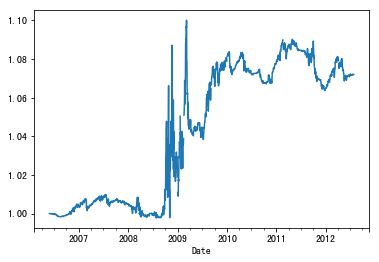

In [229]:
# 将该策略的收益率转换为一个收益指数，并绘制一张图表
to_index(trade_rets).plot()

In [230]:
# 假如你希望将该策略的性能按不同大小的交易期波幅进行划分。
# 年度标准差是计算波幅的一种简单方法，可以同计算夏普比率来观察不同波动机制下的风险收益率
vol = pd.rolling_std(returns,250,min_periods=200)*np.sqrt(250)
vol.tail()

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,min_periods=200,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2012-07-23    0.231203
2012-07-24    0.230438
2012-07-25    0.230415
2012-07-26    0.230871
2012-07-27    0.231525
Name: Adj Close, dtype: float64

In [231]:
def sharpe(rets,ann=250):
    return rets.mean()/rets.std()*np.sqrt(ann)

In [237]:
# 利用qcut将vol划分为四等份，并用sharpe进行聚合
trade_rets =trade_rets.ix[vol.index]  # 由于两个数据的长度不一样，将长度都设置为vol的长度
trade_rets.groupby(pd.qcut(vol,4)).agg(sharpe)

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Adj Close
(0.0944, 0.16]   -0.012374
(0.16, 0.188]     0.278558
(0.188, 0.231]   -0.325217
(0.231, 0.457]    0.525923
Name: Adj Close, dtype: float64

# 信号前沿分析
介绍一种简化的截面动量投资组合，并得到模型参数化网格

In [5]:
# 将金融和技术领域中的几只股票做成一个投资组合，并加载它们的历史价格数据
import pandas_datareader.data as web
names = ['AAPL','GOOG','MSFT','GS','MS','BAC','C']
def get_px(stock,start,end):
    return web.get_data_yahoo(stock,start,end)['Adj Close']

In [6]:
px = pd.DataFrame({name:get_px(name,'2009-01-01','2012-06-01') for name in names})
px.head()

,AAPL,BAC,C,GOOG,GS,MS,MSFT
Date,,,,,,,
2008-12-31,10.555326,12.424986,60.725376,153.250580,71.672134,13.191438,14.868458
2009-01-02,11.223147,12.645598,64.616867,160.060059,73.684967,13.972719,15.549164
2009-01-05,11.696809,12.336741,64.073860,163.412491,75.400528,14.490844,15.694486
2009-01-06,11.503882,12.601477,67.512863,166.406265,75.341080,16.102755,15.878043
2009-01-07,11.255305,12.098475,64.707367,160.403763,71.765533,14.885596,14.921995


In [11]:
# pad/ffill：用前一个非缺失值去填充该缺失值; 
# backfill/bfill：用下一个非缺失值填充该缺失值
px = px.asfreq('B').fillna(method='pad')   # 工作日频率
rets = px.pct_change()
rets.head()

,AAPL,BAC,C,GOOG,GS,MS,MSFT
Date,,,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-01-02,0.063269,0.017756,0.064083,0.044434,0.028084,0.059226,0.045782
2009-01-05,0.042204,-0.024424,-0.008403,0.020945,0.023282,0.037081,0.009346
2009-01-06,-0.016494,0.021459,0.053672,0.018320,-0.000788,0.111237,0.011696


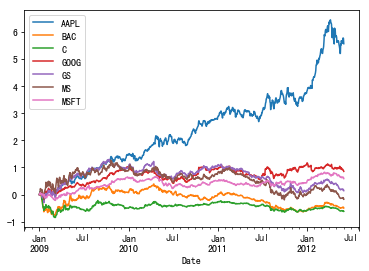

In [12]:
((1+rets).cumprod()-1).plot()   # 绘制每只股票的累计收益

In [43]:
# 对于投资组合的构建，需要计算特定回顾期的动量，然后按降序排列并标准化
def calc_mom(price,lookback,lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1,ascending=False) # 每一行的数据按降序排序号，如最大值对于的序号为1，依次类推
    # 标准化，公式（x-mean）/std
    demeaned = ranks.sub(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1),axis=0)

In [60]:
# 利用这个变换函数，再编写一个对策略进行事后检验的函数：通过指定回顾期和持有期（买卖之间的日数）计算投资组合整体的夏普比率
compound = lambda x: (1+x).prod()-1
daily_sr = lambda x: x.mean()/x.std()

def strat_sr(prices,lb,hold):
    # 计算投资组合权重
    freq = '%dB' % hold    # 频率为hold个工作日
    port = calc_mom(prices,lb,lag=1)
    daily_rets = prices.pct_change()
    
    # 计算投资组合收益
    port = port.shift(1).resample(freq,how='first')  # 按freq重采样，取第一个值
    returns = daily_rets.resample(freq,how=compound)  # 按freq重采样后，最终值由compound方法计算得到
    port_rets = (port*returns).sum(axis=1)  # 两个数据相同日期上的值相乘完后，按行求和
    
    return daily_sr(port_rets)*np.sqrt(252/hold)  # 输出的是一个数值


In [61]:
# 通过价格数据以及一对参数组合调用该函数将会得到一个标量值
strat_sr(px,70,30)

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


0.13145038363829603

In [75]:
# 然后对参数网格（即多对参数组合）应用strat_sr函数，并将结果保存在一个defaultdict中，最后再将全部结果放进一个DataFrame
from collections import defaultdict

lookbacks = range(20,90,5)
holdings = range(20,90,5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px,lb,hold)  # dd[lb] 输出是：{lb:{} }  相当于lb是列，hold是对于的行
ddf = pd.DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


In [71]:
# 为了便于观察，将该结果图形化，生成一张带有装饰物的热图
import matplotlib.pyplot as plt

def heatmap(df,cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values,cmap = cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

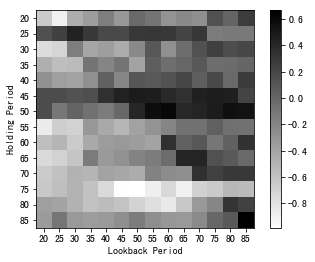

In [72]:
# 对事后检验结果调用该函数
heatmap(ddf)

# 期货合约转仓
期货是一种无所不在的衍生品合约。它是一种在指定日期交收指定资产（比如石油、黄金或FTSE100指数的股份）的约定。在实践中，由于期货合约具有限时性，对（股票、货币、商品、债券以及其他资产类）期货合约的建模和交易是复杂的。例如，对于某种期货（比如银或铜期货），在给定时间点，可能有多个到期时间不同的合约被交易。
- 一般来说，下一个期满的期货合约（即近期合约）将是最具流动性的（成交量最高和买卖差价最低）
- 通过一个表示盈亏（始终持有近期合约）的连续的收益指数即可轻松实现建模和预测
- 从一份到期合约过渡到下一期（或更远）合约称为转仓


In [80]:
# 用SPY交易所基金的部分价格作为标准普尔500 指数的代理
import pandas_datareader.data as web
# 标准普尔500指数的近似价格
px = web.get_data_yahoo('SPY','2011-08-01','2012-07-27')['Adj Close']*10
px

Date
2011-08-01    1074.033051
2011-08-02    1046.594086
2011-08-03    1052.265320
2011-08-04    1002.975693
2011-08-05    1001.474686
2011-08-08     936.255035
2011-08-09     979.790573
2011-08-10     936.505127
2011-08-11     978.539124
2011-08-12     985.127945
2011-08-15    1005.977859
2011-08-16     997.387695
2011-08-17     998.054886
2011-08-18     955.020218
2011-08-19     939.424057
2011-08-22     940.175095
2011-08-23     971.116486
2011-08-24     984.794006
2011-08-25     969.782181
2011-08-26     983.876724
2011-08-29    1012.149658
2011-08-30    1014.818573
2011-08-31    1019.322205
2011-09-01    1008.646774
2011-09-02     982.875977
2011-09-06     975.703506
2011-09-07    1003.225632
2011-09-08     992.800674
2011-09-09     966.779556
2011-09-12     973.034668
                 ...     
2012-06-15    1142.504120
2012-06-18    1144.718475
2012-06-19    1155.790939
2012-06-20    1153.917084
2012-06-21    1128.024673
2012-06-22    1136.711884
2012-06-25    1118.485641
2012-06

In [86]:
# 在一个Series中放了两份标准普尔500指数期货合约及其到期日期
from datetime import datetime
expiry = {'ESU2':datetime(2012,9,21),
          'ESZ2':datetime(2012,12,21)}
expiry = pd.Series(expiry).sort_values()  # series的数据 按值升序排序
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

In [91]:
# 用Yahoo!Finance的价格以及一个随机漫步和一些噪声来模拟这两份合约未来的走势
np.random.seed(12347)
N = 200
walk = (np.random.randint(0,200,size=N)-100)*0.25   # 数据范围在-25 到 25之间
perturb = (np.random.randint(0,20,size=N)-10)*0.25  # 数据范围在-2.5 到 2.5之间
walk = walk.cumsum()  # 累计求和

323.5 -38.0


In [95]:
rng = pd.date_range(px.index[0],periods = len(px)+N,freq='B')
near = np.concatenate([px.values,px.values[-1]+walk])  # 近期合约
far = np.concatenate([px.values,px.values[-1]+walk+perturb])  # 远期合约
prices = pd.DataFrame({'ESU2':near,'ESZ2':far},index=rng)  # prices是关于两个合约的时间序列
prices.head()

,ESU2,ESZ2
2011-08-01,1074.033051,1074.033051
2011-08-02,1046.594086,1046.594086
2011-08-03,1052.265320,1052.265320
2011-08-04,1002.975693,1002.975693
2011-08-05,1001.474686,1001.474686


In [133]:
# 将多个时间序列合并为单个连续序列的一个方法就是构造一个加权矩阵。活动合约的权重应该设为1，直到满期为值。到那个时候，必须决定一个转仓约定
# 下面这个函数可以计算一个加权矩阵（权重根据到期前的期数减少而线性衰减）
def get_roll_weights(start,expiry,items,roll_periods=5):
    #start:用于计算权重加权矩阵的第一天
    #expiry：由“合约代码->到期日期”组成的序列
    # items: 一组合约名称
    
    dates = pd.date_range(start,expiry[-1],freq='B')
    weights = pd.DataFrame(np.zeros((len(dates),len(items))),index=dates,columns=items)
    
    prev_date = weights.index[0]
    for i,(item,ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:  # 不是最后一个合约
             # prev_date到 到期时间前的所有数据权重设为1
            weights.ix[prev_date:pd.Timestamp(ex_date)-pd.offsets.BDay(),item] = 1 
            roll_rng = pd.date_range(end=pd.Timestamp(ex_date)-pd.offsets.BDay(),periods=roll_periods+1,freq='B')
            decay_weights = np.linspace(0,1,roll_periods+1)
            weights.ix[roll_rng,item] = 1-decay_weights  # 当前合约在roll_rng时间上随着时间减少权重
            weights.ix[roll_rng,expiry.index[i+1]] = decay_weights # 下个合约在roll_rng时间上随着时间增加权重
        else:  # 是最后一个合约
            weights.ix[prev_date:,item] = 1
        prev_date = ex_date
    return weights

In [136]:
# 快到ESU2到期日的那几天的权重
weights = get_roll_weights('6/1/2012',expiry,prices.columns)
weights.ix['2012-09-12':'2012-09-21']

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


,ESU2,ESZ2
2012-09-12,1.0,0.0
2012-09-13,1.0,0.0
2012-09-14,0.8,0.2
2012-09-17,0.6,0.4
2012-09-18,0.4,0.6
2012-09-19,0.2,0.8
2012-09-20,0.0,1.0
2012-09-21,0.0,1.0


In [139]:
# 转仓期货收益就是合约收益的加权和
rolled_returns = (prices.pct_change()*weights).sum(1)
rolled_returns['2012-09']

2012-09-03    0.009396
2012-09-04    0.002234
2012-09-05   -0.007616
2012-09-06    0.002059
2012-09-07    0.013449
2012-09-10   -0.005161
2012-09-11   -0.001667
2012-09-12    0.003526
2012-09-13   -0.011835
2012-09-14    0.002208
2012-09-17    0.010161
2012-09-18   -0.000813
2012-09-19   -0.004479
2012-09-20    0.005951
2012-09-21    0.008503
2012-09-24    0.015947
2012-09-25    0.016959
2012-09-26    0.014902
2012-09-27    0.016956
2012-09-28    0.003094
Freq: B, dtype: float64

# 移动相关系数与线性回归
移动窗口和指数加权时间序列函数就是用于处理动态模型的工具。
- 相关系数是观察两个资产时间序列的变化的协动性的一种手段。pandas的rolling_corr函数可以根据两个收益序列计算出移动窗口相关系数

In [258]:
# 从Yahoo!Finance加载一些价格序列，并计算每日收益率
aapl = web.get_data_yahoo('AAPL','2000-01-01','2012-07-27')['Adj Close']
msft = web.get_data_yahoo('MSFT','2000-01-01','2012-07-27')['Adj Close']
aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)
  


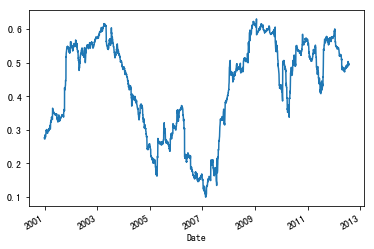

In [259]:
# 计算一年期移动相关系数并绘制图标
pd.rolling_corr(aapl_rets,msft_rets,250).plot()

In [260]:
# 两个资产之间的相关系数存在一个问题，即不能捕获波动性差异。
# 最小二乘回归提供了另一种对一个变量与一个或多个其他预测变量之间的动态关系的建模办法
msft_rets.dropna(inplace=True)
aapl_rets.dropna(inplace=True)
x= pd.DataFrame({'MSFT':msft_rets})

import statsmodels.api as sm
res=[]
timeIndex = []
for i in range(len(x)):
    if i >=250:
        windows_x =  x[i-250:i]
        windows_X = sm.add_constant(windows_x)  # 增加常数项
        windows_y =  aapl_rets[i-250:i]
        res_model = sm.OLS(windows_y,windows_X).fit().params
        res.append([res_model['const'],res_model['MSFT']])
        timeIndex.append(x.index[i])
results  = pd.DataFrame(res,columns=['const','MSFT'],index = timeIndex)  


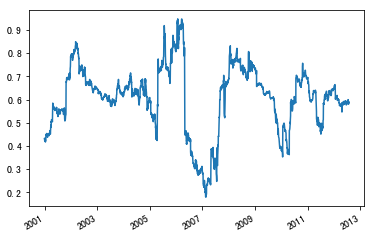

In [261]:
results['MSFT'].plot()